In [285]:
import pandas as pd
import numpy as np
import operator
import re
from collections import OrderedDict
import seaborn as sns
import pickle
import os.path
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
from pylab import rcParams
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import math
import warnings
from scipy import stats
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import scipy
import pylab
import time

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

<img src="Model-comparison.png"></img>

In [102]:
df= pd.read_csv('encoded.csv')

In [26]:
df.shape

(533183, 73)

In [27]:
list(df.columns).index('CANCELLED')

44

In [28]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)


## KNN Neighbors 

In [29]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values

In [30]:
df = pd.DataFrame(X,columns=df.columns[:-1])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=24,stratify=y,test_size=0.3)

In [33]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')

In [34]:
knn.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
knn.score(X_test,y_test)

0.9999562376918508

In [55]:
scores_test=[]
scores_train=[]

In [52]:
%time
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
scores_test.append(knn.score(X_test,y_test))

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [56]:
%time
for i in range(1,10,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    scores_test.append(knn.score(X_test,y_test))
    print(knn.score(X_test,y_test))
    scores_train.append(knn.score(X_train,y_train))
    print(knn.score(X_train,y_train))
    print(i, 'done')
scores

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.96 µs
0.9999249789003157
1.0
1 done
0.9999249789003157
0.9999490927797485
3 done
0.9999374824169298
0.9999356961428403
5 done
0.9999562376918508
0.9999330168154587
7 done
0.9999562376918508
0.999930337488077
9 done


[0.9999249789003157]

Text(0.5, 1.0, 'Model Accuracy')

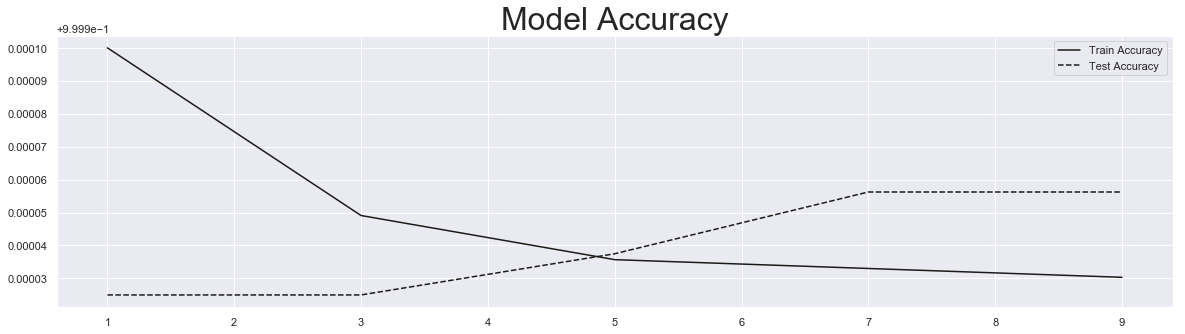

In [75]:
sns.set()
plt.figure(figsize=(20,5))
plt.plot(range(1,10,2), scores_train ,label = "Train Accuracy",color='k')
plt.plot(range(1,10,2),scores_test,label = "Test Accuracy",linestyle='dashed',color='k')
plt.legend()
plt.title("Model Accuracy",size=32)


## Linear Regression 

In [103]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [104]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values

In [105]:
df.columns

Index(['Unnamed: 0', 'YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'FLIGHT_NUMBER',
       'ORG_apparentTemperature', 'ORG_cloudCover', 'ORG_dewPoint',
       'ORG_humidity', 'ORG_precipAccumulation', 'ORG_precipIntensity',
       'ORG_precipProbability', 'ORG_pressure', 'ORG_temperature',
       'ORG_visibility', 'ORG_windBearing', 'ORG_windGust', 'ORG_windSpeed',
       'DEST_apparentTemperature', 'DEST_cloudCover', 'DEST_dewPoint',
       'DEST_humidity', 'DEST_precipAccumulation', 'DEST_precipIntensity',
       'DEST_precipProbability', 'DEST_pressure', 'DEST_temperature',
       'DEST_visibility', 'DEST_windBearing', 'DEST_windGust',
       'DEST_windSpeed', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'WHEELS_ON', 'TAXI_IN',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED',
       'CANCELLED', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'IsHoliday', 'D

In [78]:
list(df.columns).index('ORIGIN_AIRPORT')

63

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=24,stratify=y,test_size=0.3)

In [107]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [108]:
predicted= reg.predict(X_test)

In [109]:
reg.score(X_test,y_test)

0.8131513554063308

## Linear Regression 

In [110]:
df= pd.read_csv('encoded.csv')

In [111]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values

In [114]:
from sklearn.model_selection import cross_val_score 
from sklearn import linear_model
reg = linear_model.LinearRegression()

In [121]:
# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X,y,cv=5)

In [122]:
print(cv_scores)

[  0.74341818   0.90379564   0.8877202    0.69469173 -94.6679163 ]


In [127]:
np.mean(cv_scores[:4])

0.8074064368101855

## Ridge Regression 

In [229]:
from sklearn.linear_model import Ridge

In [230]:
df= pd.read_csv('encoded.csv')

In [231]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values
names=df.drop(["CANCELLED"], axis=1).columns

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)

In [233]:
ridge=Ridge(alpha=0.1,normalize=True)

In [234]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [235]:
ridge.predict(X_test)

array([ 0.00531073,  0.01598692,  0.00410244, ..., -0.03404288,
        0.00951486,  0.00985361])

In [236]:
ridge.score(X_test,y_test)

0.6714362741250085

In [240]:
names.shape

(72,)

In [261]:
a =pd.DataFrame(ridge.coef_, index=names).sort_values(by=0,ascending=False)
a.columns =['Coeff']
a.head()

,Coeff
ORG_precipIntensity,0.152063
ORG_precipAccumulation,0.086595
IsHoliday,0.028590
ORG_humidity,0.013684
DEST_precipIntensity,0.011160


In [262]:
a.tail()

,Coeff
ORG_precipProbability,-0.007581
MONTH,-0.009435
DEST_humidity,-0.017312
DEST_precipAccumulation,-0.036632
DIVERTED,-0.287573


## Lasso Regression 

In [179]:
from sklearn.linear_model import Lasso

In [201]:
df= pd.read_csv('encoded.csv')

In [202]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values

In [224]:
lasso=Lasso(alpha=0.01,normalize=True)

In [225]:
lasso.fit(X,y)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [226]:
lasso_coeff=lasso.fit(X,y).coef_
lasso_coeff

array([-0.,  0., -0.,  0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,
        0., -0., -0.,  0.,  0.,  0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0.,
        0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0., -0.])

In [227]:
print(len(X))
print(len(y))

533183
533183


(-0.025, 0.025)

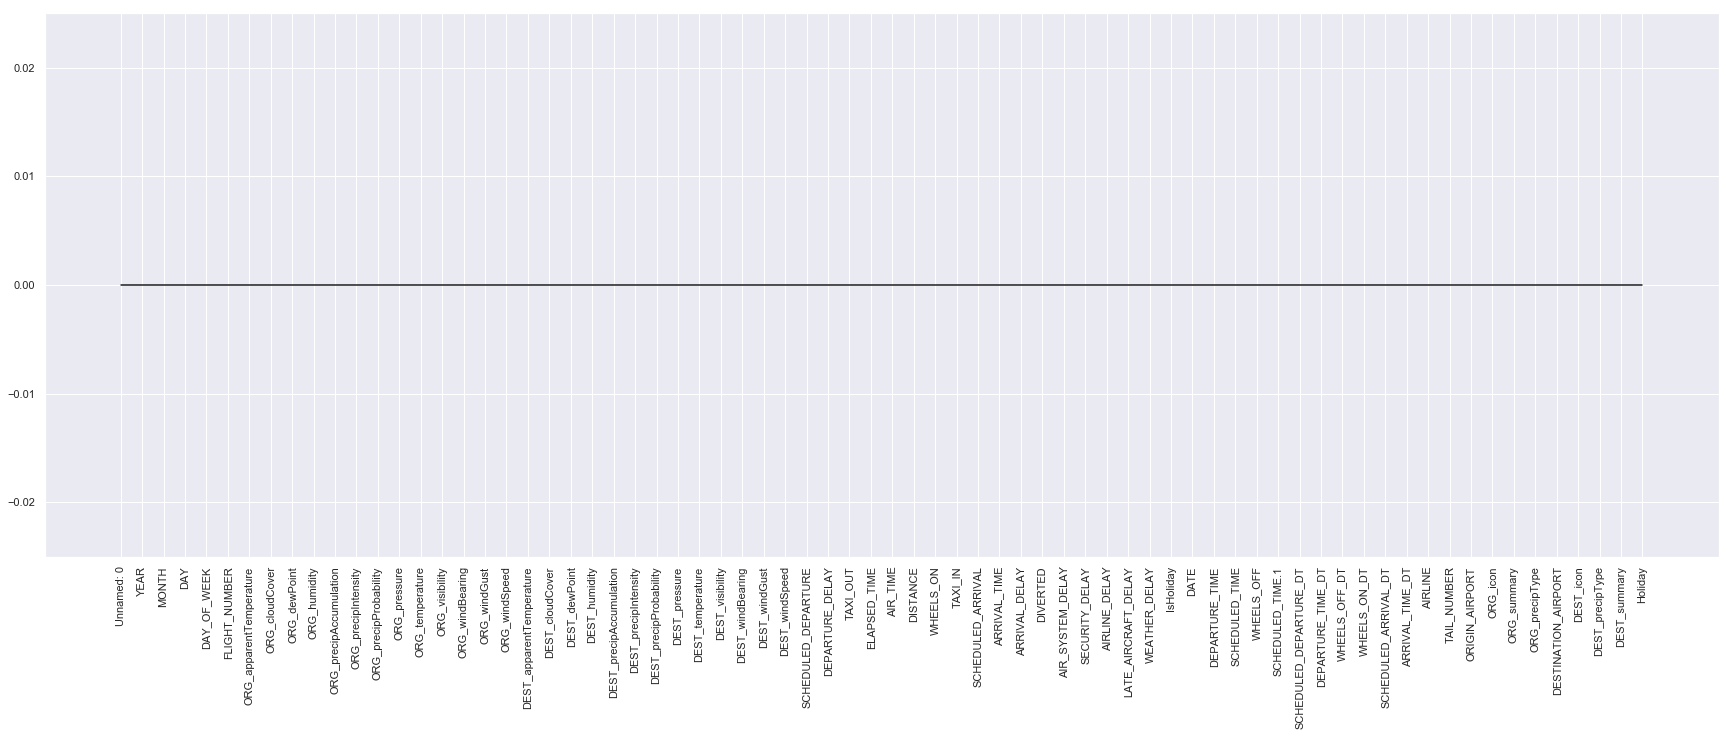

In [263]:
plt.figure(figsize=(30,10))
plt.plot(range(len(df.drop(["CANCELLED"], axis=1).columns)),lasso_coeff,color='k')
plt.xticks(range(len(df.drop(["CANCELLED"], axis=1).columns)),df.drop(["CANCELLED"], axis=1).columns,rotation=90)
plt.ylim(-.0250,0.025)

In [264]:
lasso.score(X,y)

0.0

## Confusion Matrix

In [265]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn= KNeighborsClassifier(n_neighbors=8)

In [232]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)

In [266]:
knn.fit(X_train,y_train)
predicted = knn.predict(X_test)

In [267]:
print(confusion_matrix(y_test,predicted))

[[158336      0]
 [    13   1606]]


In [268]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158336
           1       1.00      0.99      1.00      1619

   micro avg       1.00      1.00      1.00    159955
   macro avg       1.00      1.00      1.00    159955
weighted avg       1.00      1.00      1.00    159955



In [270]:
13/158336*100

0.008210388035569928

## Confusion Matrix

In [271]:
from sklearn.linear_model import LogisticRegression


In [274]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)

In [275]:
logreg = LogisticRegression() 

In [277]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [278]:
predicted = logreg.predict(X_test) 

In [292]:
logreg.score(X_test,y_test)

0.9999124753837016

In [279]:
from sklearn.metrics import roc_curve

In [301]:
pre_prob = logreg.predict_log_proba(X_test)[:,1]

In [302]:
fpr,tpr,treshold=roc_curve(y_test,predicted)

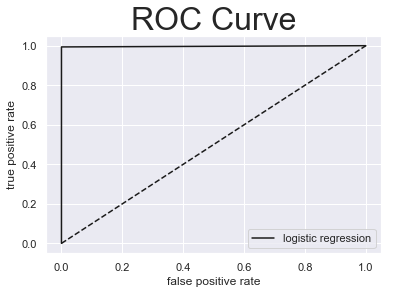

In [296]:
sns.set()
plt.title("ROC Curve",size=32)
plt.plot([0,1],[0,1],'k--',color='k')
plt.plot(fpr,tpr,label='logistic regression', color='k')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show()



In [317]:
matrix = confusion_matrix(y_test,predicted)
print(confusion_matrix(y_test,predicted))

[[158332      4]
 [    10   1609]]


In [327]:
TP= matrix[0][0]
print("TP : ",TP)

FP= matrix[1][0]
print("FP : ",FP)

FN= matrix[0][1]
print("FN : ",FN)

TN= matrix[1][1]
print("TN : ",TN)

TP :  158332
FP :  10
FN :  4
TN :  1609


In [329]:
Precision = TP/(TP+FP)
Recall = TP/(TP+FN)

In [330]:
print('Precision: ',Precision)
print('Recall : ',Recall)

Precision:  0.9999368455621377
Recall :  0.9999747372675829


In [338]:
TP_ = []
FP_ = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    X_train,X_test, y_train,y_test = train_test_split(X,y,random_state=42,stratify=y,test_size=0.3)
    knn.fit(X_train,y_train)
    predicted = knn.predict(X_test)
    matrix = confusion_matrix(y_test,predicted)
    TP = matrix[0][0]
    print("TP : ",TP)
    FP = matrix[1][0]
    print("FP : ",FP)
    #FN = matrix[0][1]
    print("FN : ",FN)
    #TN = matrix[1][1]
    print("TN : ",TN)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    TP_.append(TP)
    FP_.append(FP)


TP :  158330
FP :  11
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158335
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606
TP :  158336
FP :  13
FN :  0
TN :  1606


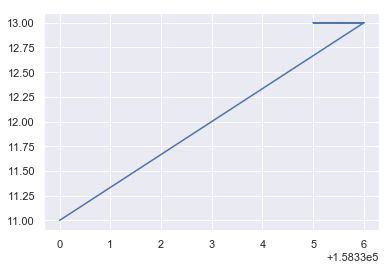

In [340]:
plt.plot(TP_,FP_)


In [341]:
df= pd.read_csv('encoded.csv')

In [342]:
X = df.drop(["CANCELLED"], axis=1).values
X=np.nan_to_num(X)
y = df.CANCELLED.astype(int).values

In [344]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))

# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(logreg,X,y,cv=5,scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC: 0.9999921590345648
AUC scores computed using 5-fold cross-validation: [0.99999844 0.99999909 0.99999955 0.99999399 0.98908179]


In [346]:
np.mean([0.99999844, 0.99999909, 0.99999955, 0.99999399, 0.98908179])

0.997814572

In [358]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 8, 5)
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

# Fit it to the data
logreg_cv.fit(X,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Best score is {}".format(logreg_cv.best_score_))


Tuned Logistic Regression Parameters: {'C': 0.01778279410038923}
Best score is 0.9984995770682861


In [ ]:
# Import necessary modules
from sklearn.preprocessing import Imputer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# Setup the pipeline steps: steps
steps = [ ('SVM', SVC())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3, random_state=42)

# Fit the pipeline to the train set
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
y_pred = pipeline.predict(X_test)

# Compute metrics
print(classification_report(y_test, y_pred))
